Nama        : Zaini Thoriq Taufiqurrahman <br>
NPM         : 5220411245 <br>
Review Film : A Bussiness Proposal (2025) <br>
Channel     : Ngelantur <br>
Link        : https://www.youtube.com/watch?si=LgDblN7dSP6U6tUV&v=vFUT18yhMB8&feature=youtu.be

# Preprocessing

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import html
import re
import html
import string
import nltk

from wordcloud import WordCloud
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
df = pd.read_csv("youtube-comments.csv")
df

Date           UserName  \
0     2025-10-11T12:13:48Z      @yanz_mikarin   
1     2025-10-06T09:26:33Z         @GirlCeres   
2     2025-09-21T03:27:23Z  @fadhilah.ind0260   
3     2025-09-19T23:12:12Z      @lionelsikudo   
4     2025-09-15T13:03:46Z  @randomthingpopup   
...                    ...                ...   
3392  2025-02-12T09:39:20Z   @athiftsabit1208   
3393  2025-02-12T09:39:16Z      @Radikaaa_jpg   
3394  2025-02-12T09:39:07Z  @zavaandremaz4661   
3395  2025-02-12T09:39:01Z    @husainadam2855   
3396  2025-02-12T09:38:47Z      @I_feelsocool   

                                                Comment  Like  
0     Jujur statement dia ini kek sok idealis gitu y...     0  
1                        Ternyata gua seumuran nglantur     0  
2     <a href="https://www.youtube.com/watch?v=vFUT1...     3  
3     baru nonton film nya...second lead yg cewek su...     1  
4     Mau hemat pakek yg murah malah jadi boncos<br>...     2  
...                                                 ...   ...  
3392                                                🔥🔥🔥     3  
3393                                        Kesekian bg     1  
3394                                            Pertama     0  
3395                                                ❤❤❤     2  
3396                                                  P     0  

[3397 rows x 4 columns]

# Hapus Duplikat

In [62]:
# Cek jumlah duplikat berdasarkan kolom comment
duplicate = df.duplicated(subset='Comment').sum()
print(f"Jumlah duplikat berdasarkan kolom Comment: {duplicate}")


Jumlah duplikat berdasarkan kolom Comment: 15


In [63]:
# Melihat duplikasi
df[df.duplicated(subset='Comment', keep=False)]

Date                UserName  \
181   2025-03-17T17:11:35Z                @nuibari   
182   2025-03-17T17:11:20Z                @nuibari   
509   2025-02-19T05:24:42Z               @byun6720   
747   2025-02-16T16:29:55Z         @Paulussihaloho   
748   2025-02-16T16:29:45Z         @Paulussihaloho   
791   2025-02-16T13:23:35Z             @YoayonGame   
873   2025-02-16T06:18:23Z       @JefriJengkol-s6s   
875   2025-02-16T06:16:17Z       @JefriJengkol-s6s   
1272  2025-02-14T13:51:43Z              @folkz6457   
1406  2025-02-14T05:43:57Z         @fernadyamyuzik   
1416  2025-02-14T05:10:25Z               @MalsDuko   
1417  2025-02-14T05:09:43Z               @MalsDuko   
1419  2025-02-14T05:08:55Z               @MalsDuko   
1779  2025-02-13T04:58:45Z               @ciul6659   
1780  2025-02-13T04:58:29Z               @ciul6659   
1908  2025-02-13T02:05:28Z                  @ar3nz   
2333  2025-02-12T14:51:19Z            @asri.bob666   
2571  2025-02-12T12:30:53Z              @FoxKingCh   
2572  2025-02-12T12:30:37Z              @FoxKingCh   
2836  2025-02-12T17:59:19Z     @KevinTejakusuma208   
2852  2025-02-12T11:10:25Z             @iksan_1997   
3045  2025-02-12T17:59:05Z     @KevinTejakusuma208   
3128  2025-02-12T10:20:11Z  @sitiaisyahdamanik7819   
3266  2025-02-12T17:59:00Z     @KevinTejakusuma208   
3271  2025-02-12T10:15:26Z          @AdityaFrhan26   
3311  2025-02-12T09:49:25Z             @RyukApinri   

                                                Comment  Like  
181   Kasian ulet bulu (yono) udh susah2 masuk layar...     0  
182   Kasian ulet bulu (yono) udh susah2 masuk layar...     0  
509                                                  😂😂     0  
747          🤙🤙Situss yang paling aku sukaa 𝐆𝐀𝐑𝐔𝐃𝐀138 😍     0  
748          🤙🤙Situss yang paling aku sukaa 𝐆𝐀𝐑𝐔𝐃𝐀138 😍     0  
791                                                 😂😂😂     0  
873   Gua sbgai penikmat anime, bola dan action Kore...     0  
875   Gua sbgai penikmat anime, bola dan action Kore...     0  
1272                          Review petaka gunung gede     0  
1406                                                  😂     0  
1416           Film apaan sih emang😅, kga pernah nonton     0  
1417           Film apaan sih emang😅, kga pernah nonton     0  
1419           Film apaan sih emang😅, kga pernah nonton     0  
1779  Bad publicity still publicity ga berlaku di fi...     0  
1780  Bad publicity still publicity ga berlaku di fi...     0  
1908                          Review petaka gunung gede     0  
2333                                                😂😂😂     0  
2571  Ya contohnya kayak marvel mau buat film adapta...     0  
2572  Ya contohnya kayak marvel mau buat film adapta...     0  
2836  Makanya jangan suka nyembah ENO BENING terus, ...     0  
2852                                                  😂     1  
3045  Makanya jangan suka nyembah ENO BENING terus, ...     3  
3128                                                😂😂😂     0  
3266  Makanya jangan suka nyembah ENO BENING terus, ...     1  
3271                                                 😂😂    17  
3311                                                  😂     0

In [64]:
# Hapus duplikat berdasarkan kolom comment
df = df.drop_duplicates(subset='Comment', keep='first').reset_index(drop=True)

In [65]:
# Cek jumlah duplikat berdasarkan kolom comment
duplicate = df.duplicated(subset='Comment').sum()
print(f"Jumlah duplikat setelah di hapus: {duplicate}")

Jumlah duplikat setelah di hapus: 0


# Normalisasi Teks

In [66]:
def clean_html(text):
    if pd.isna(text):
        return ""

    # 1. Hapus tag HTML (misal <br>, <a href=...>, dll)
    text = re.sub(r'<.*?>', '', text)

    # 2. Decode entitas HTML (&amp;, &quot;, dll)
    text = html.unescape(text)

    # 3. Hapus emoji / emotikon (unicode non-ASCII)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # 4. Ubah ke huruf kecil
    text = text.lower()

    # 5. Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # 6. Hapus tanda baca (punctuation)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 7. Hapus kata berulang 
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # 8. Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    stop_words = set(stopwords.words('indonesian'))
    custom_stopwords = {"ga", "gak", "yg", "nya", "gw", "aja", "si", "sih", 
                        "banget", "ya", "bang", "nonton", "udah", "film", "fan", "abidzar",
                        "fans", "orang", "lu", "aktor", "bikin", "kalo", 
                        "gue", "gua", "tau", "bilang", "emang", "karakter", "gk", "udh",
                        "bgt", "pa", "klo"}
    stop_words.update(custom_stopwords)

    tokens = [word for word in text.split() if word not in stop_words]
    text = ' '.join(tokens)

    return text

df['Cleaned_Comment'] = df['Comment'].apply(clean_html)

In [67]:
df[['Comment', 'Cleaned_Comment']].head(500)

Comment  \
0    Jujur statement dia ini kek sok idealis gitu y...   
1                       Ternyata gua seumuran nglantur   
2    <a href="https://www.youtube.com/watch?v=vFUT1...   
3    baru nonton film nya...second lead yg cewek su...   
4    Mau hemat pakek yg murah malah jadi boncos<br>...   
..                                                 ...   
495                     Yoshikatsu Kimura pasti bangga   
496  mungkin sutradara harus nyari referensi biar l...   
497  Intinya itu akibat dri abizar sombong aja, ber...   
498  <a href="https://www.youtube.com/watch?v=vFUT1...   
499            Mungkin bro mau menjadi snow white woke   

                                       Cleaned_Comment  
0           jujur statement kek sok idealis gitu nggak  
1                                    seumuran nglantur  
2    653 sbnrnya abijar tuh senior berpengalaman ke...  
3    nyasecond lead cewek suka salah bagus abizar s...  
4    hemat pakek murah boncosmau paket hemat 142 ak...  
..                                                 ...  
495                           yoshikatsu kimura bangga  
496  sutradara nyari referensi biar bagus contohnya...  
497  intinya akibat dri abizar sombong berasa main ...  
498  036lagunya pump it up lupa namanya dipilih dan...  
499                                bro snow white woke  

[500 rows x 2 columns]

In [68]:
# Masukkan ke dalam csv
df[['Comment', 'Cleaned_Comment']].to_csv('youtube-comments-cleaned.csv', index=False)

# Bi-Gram

In [69]:
def bigrams(text):
    tokens = text.split()
    bigrams = [' '.join(pair) for pair in zip(tokens, tokens[1:])]
    return bigrams

In [70]:
df['Bigram_Comment'] = df['Cleaned_Comment'].apply(bigrams)

df['Bigram_Comment'].head(50)

0     [jujur statement, statement kek, kek sok, sok ...
1                                   [seumuran nglantur]
2     [653 sbnrnya, sbnrnya abijar, abijar tuh, tuh ...
3     [nyasecond lead, lead cewek, cewek suka, suka ...
4     [hemat pakek, pakek murah, murah boncosmau, bo...
5     [malam kak, kak izin, izin request, request dr...
6     [penonton masterpiece, masterpiece merahputih,...
7     [nggak ngomenin, ngomenin perannya, perannya a...
8     [part sin, sin temo, temo takut, takut hujan, ...
9     [kak review, review namamu, namamu doaku, doak...
10     [nongol netflix, netflix males, males nontonnya]
11                                                   []
12    [rule 4, 4 btw, btw suka, suka anime, anime ma...
13                                 [18 jelek, jelek ha]
14    [blindspot istilahnya, istilahnya pitfall, pit...
15                             [anaknya ust, ust jefry]
16                                  [aowkoawkowka enak]
17    [naruto pngn, pngn remake, remake naruto, 

In [71]:
df['Bigram_Comment'].to_csv('youtube-comments-bigram.csv', index=False)

# Tri-Gram

In [72]:
def trigrams(text):
    tokens = text.split()
    trigrams = [' '.join(triple) for triple in zip(tokens, tokens[1:], tokens[2:])]
    return trigrams

In [73]:
df['Trigram_Comment'] = df['Cleaned_Comment'].apply(trigrams)

df['Trigram_Comment'].head(50)

0     [jujur statement kek, statement kek sok, kek s...
1                                                    []
2     [653 sbnrnya abijar, sbnrnya abijar tuh, abija...
3     [nyasecond lead cewek, lead cewek suka, cewek ...
4     [hemat pakek murah, pakek murah boncosmau, mur...
5     [malam kak izin, kak izin request, izin reques...
6     [penonton masterpiece merahputih, masterpiece ...
7     [nggak ngomenin perannya, ngomenin perannya ar...
8     [part sin temo, sin temo takut, temo takut huj...
9     [kak review namamu, review namamu doaku, namam...
10      [nongol netflix males, netflix males nontonnya]
11                                                   []
12    [rule 4 btw, 4 btw suka, btw suka anime, suka ...
13                                        [18 jelek ha]
14    [blindspot istilahnya pitfall, istilahnya pitf...
15                                  [anaknya ust jefry]
16                                                   []
17    [naruto pngn remake, pngn remake naruto, r

In [74]:
df['Trigram_Comment'].to_csv('youtube-comments-trigram.csv', index=False)

# Word Cloud

In [75]:
text_data = ' '.join(df['Cleaned_Comment'].astype(str))

wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    collocations=True,   
    max_words=200,        
    colormap='viridis'    
).generate(text_data)

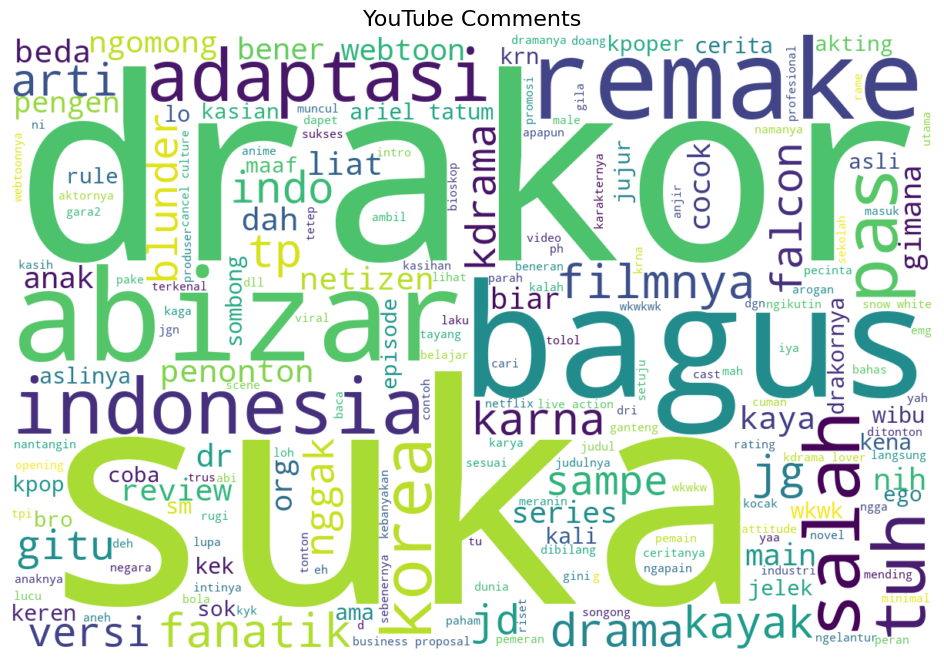

In [76]:
# --- Tampilkan word cloud ---
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("YouTube Comments", fontsize=16)
plt.show()